# 1.Traffic and Drugs Related Violations Dataset 

## **Table of Contents:** 

Link to source : https://www.kaggle.com/datasets/shubamsumbria/traffic-violations-dataset/code

Link to github project page :https://github.com/muter9/win_project/blob/main/traffic_violaions.csv

---

 ## **Presenting by:**
 ### Michael Mutter ###
  


![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/Drug-driving-774251.jpg)

## Synopsis: The project is based on a data from police reports from the field. 
##  the data, we Conclude three conclusions on the following topics:
## 1. Ages. 
## 2. Racism  
## 3. Gender. 


## <b>Importing </b> <b >Libraries and reading the data</b>


In [1]:
import glob
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML

In [2]:
url ='https://raw.githubusercontent.com/muter9/win_project/main/traffic_violaions.csv'
data = pd.read_csv(url)


## Let's take a look at our data

In [3]:
data.shape

(52966, 15)

In [4]:
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Explaination about the data:

| Column      | Description |
|:----------- |:----------- |
| stop_date      | Date of violation       |
| stop_time       | Time of violation      |
| driver_gender      | Gender of violators (Male-M, Female-F)   |
| driver_age       |  Age of violators   |
| driver_race      | Race of violators     |
| violation       | The violation kind      |
| search_conducted        | Whether search is conducted in True and False form      |
| stop_outcome        | Result of violation     |
| stop_duration       | Detained time for violators approx (in minutes)     |
| drug srelated stop        | Whether a person was involved in drugs crime (True, False)   |



## cleaning our data

In [5]:
data.drop('country_name',inplace=True,axis=1)

---
<a id='section4'></a>
  #  $\color{salmon}{\text{First conclusion : Ages}}$ 



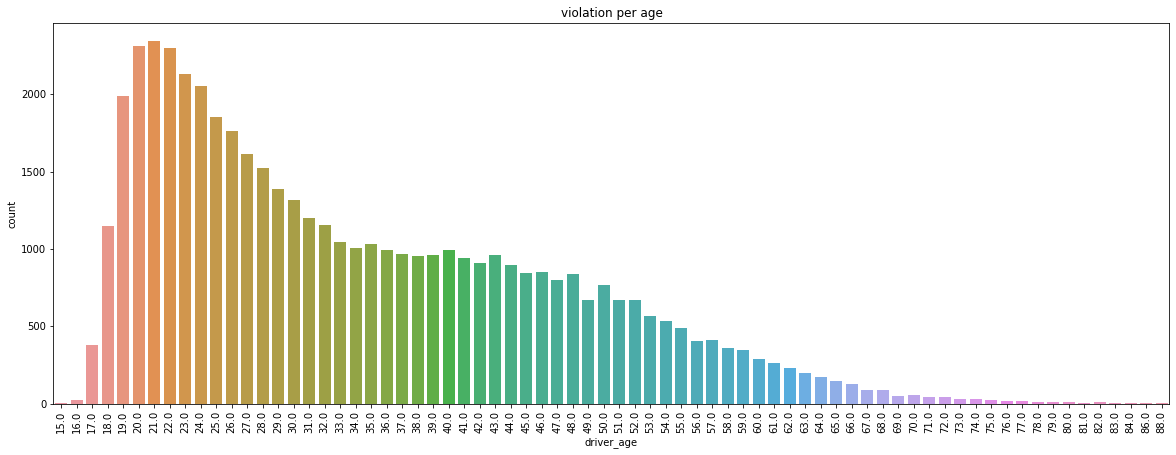

In [6]:
plt.figure(figsize= (20,7))
sns.countplot(data= data, x='driver_age')
plt.xticks(x='driver_age',  rotation=90);
plt.title('violation per age')
plt.show()

#### We can see that most of the violations are made by young people from 17 to 32. 

In [7]:
arrested_data=data.loc[data['stop_outcome'] == 'Arrest Driver']
arrested_ages= arrested_data[['driver_age']]

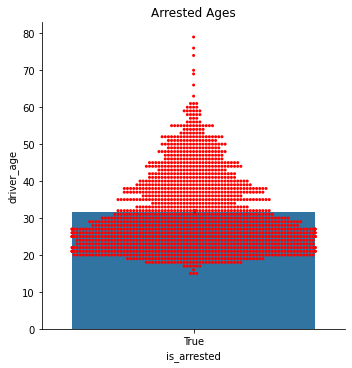

In [8]:
g = sns.catplot(x="is_arrested", y="driver_age", kind="bar", data=arrested_data)
sns.swarmplot(x="is_arrested", y="driver_age", color="r", size=3, data=arrested_data, ax=g.ax)
plt.title('Arrested Ages')
plt.show()

<AxesSubplot:>

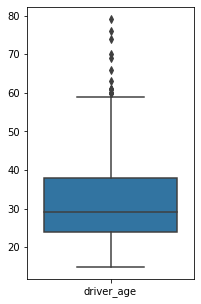

In [9]:
plt.figure(figsize=(3,5))
sns.boxplot(data = arrested_ages)

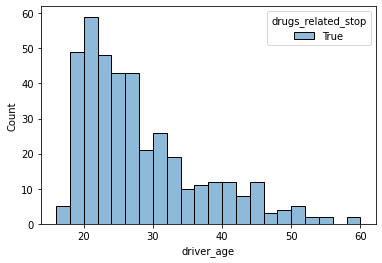

In [10]:
drugs_only=data[data['drugs_related_stop']==True]
sns.histplot(data=drugs_only, x='driver_age', hue='drugs_related_stop',binwidth=2)
plt.show()

#### most of the arrested poeple are in the median- the age of 30.

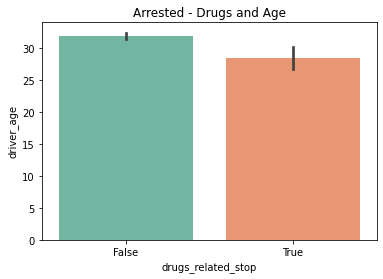

In [11]:
arrested_data=data.loc[data['stop_outcome'] == 'Arrest Driver']
#sns.histplot(data=arrested_data, x='driver_age', hue='drugs_related_stop',binwidth=2)
sns.barplot(x="drugs_related_stop", y="driver_age",  data=arrested_data,palette = 'Set2')
plt.title('Arrested - Drugs and Age')
plt.show()

#### The average age for being arrested & related to drugs is between 25 to 30.

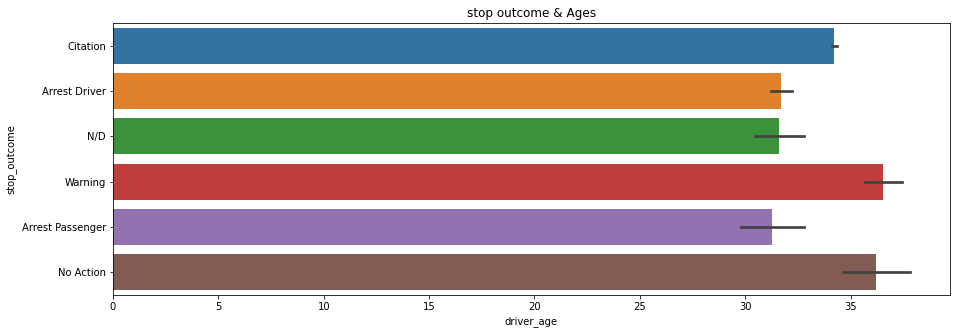

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(data = data, x='driver_age', y='stop_outcome')
plt.title('stop outcome & Ages')
plt.show()

---
## Our first conclusion following the above findings:
## we see that on average,young peole commit most of the Traffic violations.
## They were involved in drugs crime and arrested in the highest percentages.
## We recommend enforcement and information activities in the younger age groups in order to reduce the number of offenses.
## Focusing on this age group will have the best effect for handling the above offenses.
---

![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/images.jpg)

---
<a id='section4'></a>
  #  $\color{salmon}{\text{Second conclusion : Rasizm}}$ 



![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/simpson.jpeg)

In [13]:

data['driver_race'].unique()

array(['White', 'Black', 'Asian', nan, 'Hispanic', 'Other'], dtype=object)

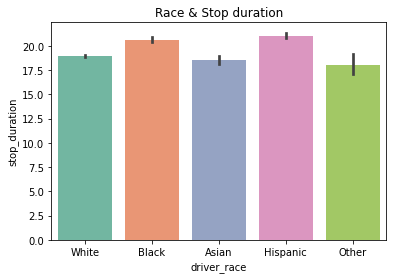

In [14]:
therty= data[data['stop_duration']== '30+ Min']
data['stop_duration']= data['stop_duration'].replace('16-30 Min',30)
data['stop_duration']= data['stop_duration'].replace('30+ Min',45)
data['stop_duration']= data['stop_duration'].replace('0-15 Min',15)
data['stop_duration'].dropna()
plt.title('Race & Stop duration')
ax = sns.barplot(x="driver_race", y="stop_duration", data=data,palette = 'Set2')

### we can see that the stopping time is the same for all ages.
### however, if we only look at stop duration over 30 minetns, we can see disturbing thing : 

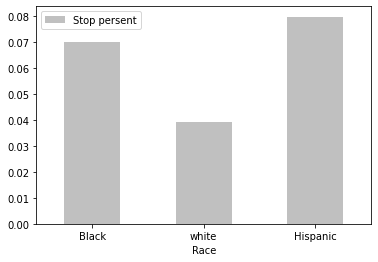

In [15]:
black=therty[therty['driver_race'] == 'Black'] 
white=therty[therty['driver_race'] == 'White']
Hispanic=therty[therty['driver_race'] == 'Hispanic']

all_black=len(data[data['driver_race'] == 'Black'])
mean_black= len(black)/all_black


all_white=len(data[data['driver_race'] == 'White'])
mean_white= len(white)/all_white

all_Hispanic=len(data[data['driver_race'] == 'Hispanic'])
mean_Hispanic= len(Hispanic)/all_Hispanic


df = pd.DataFrame({'Race':['Black', 'white','Hispanic'], 'Stop persent':[mean_black,mean_white,mean_Hispanic]})
ax = df.plot.bar(x='Race', y='Stop persent', rot=0,color='silver')

#### from all the people that were detained for a long time, minorities were arrested in average more minutes than white people.

In [16]:
numeric_search_conducted = data['search_conducted'].astype('category').cat.codes 
data['numeric_search_conducted']=numeric_search_conducted  
numeric_search_conducted.value_counts() 
search_by_race = data.groupby('driver_race')[['numeric_search_conducted']].mean() 
search_by_race

,numeric_search_conducted
driver_race,
Asian,0.023273
Black,0.077343
Hispanic,0.082215
Other,0.006711
White,0.032250


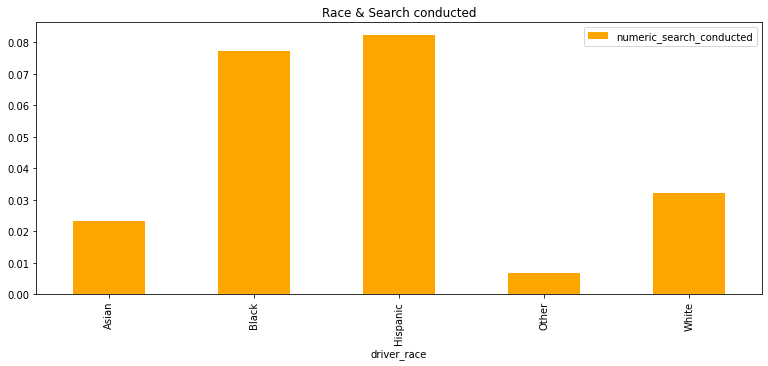

In [17]:
numeric_search_conducted = data['search_conducted'].astype('category').cat.codes 
numeric_search_conducted.value_counts() 
data['numeric_search_conducted']=numeric_search_conducted   

data.groupby(['driver_race'])[['numeric_search_conducted']].mean().plot.bar(figsize=(13,5),color='orange')  
plt.title('Race & Search conducted')
plt.show()

#### And here we can see that more searches are done on Black and Hispanic people.
#### It is true also for arrested people:

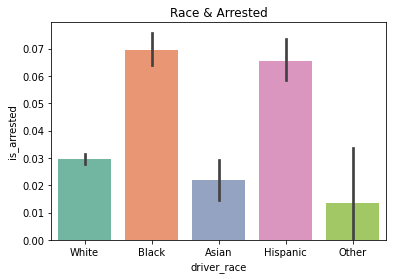

In [18]:
sns.barplot(data = data, x='driver_race', y='is_arrested',palette = 'Set2')
plt.title('Race & Arrested')
plt.show()

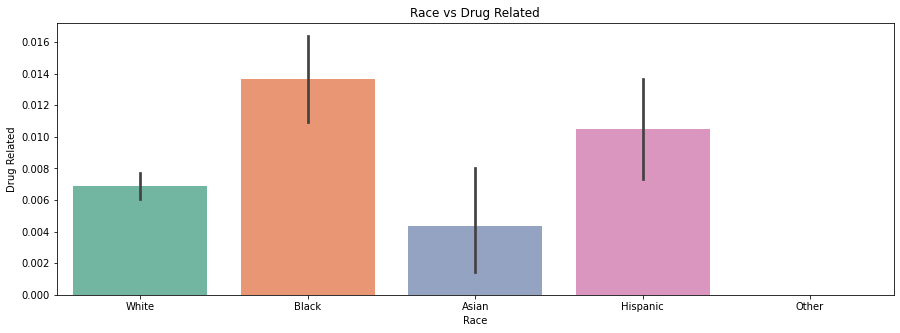

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='driver_race',y='drugs_related_stop',data=data,palette = 'Set2')
plt.title('Race vs Drug Related')
plt.ylabel('Drug Related')
plt.xlabel('Race')
plt.show()

##  Following the above data, we see that there is racism. 
## We see that minorities are stopped and searched for longer in higher percentages. 
## minorities were involved in drug crimes and were taken into custody more because they were subjected to more searches are done on them compered to other people.

---
<a id='section4'></a>
  #  $\color{salmon}{\text{Third conclusion : Gender- men vs women}}$ 



![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/man%20and%20women.jpg)

In [20]:
data.dropna(subset = ['driver_gender'],inplace= True)
numeric_driver_gender = data['driver_gender'].astype('category').cat.codes 
data['numeric_driver_gender']=numeric_driver_gender 
numeric_driver_gender.value_counts() 

1    36564
0    13016
dtype: int64

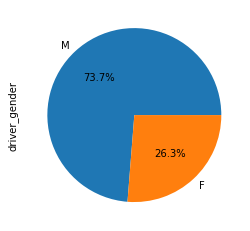

In [21]:
data['driver_gender'].value_counts().plot.pie(autopct='%1.1f%%');

#### For start, we can see that there are more men than women in our data. Thus, We will work mostly with an average.

#### now, let's see which one is doing more violations :

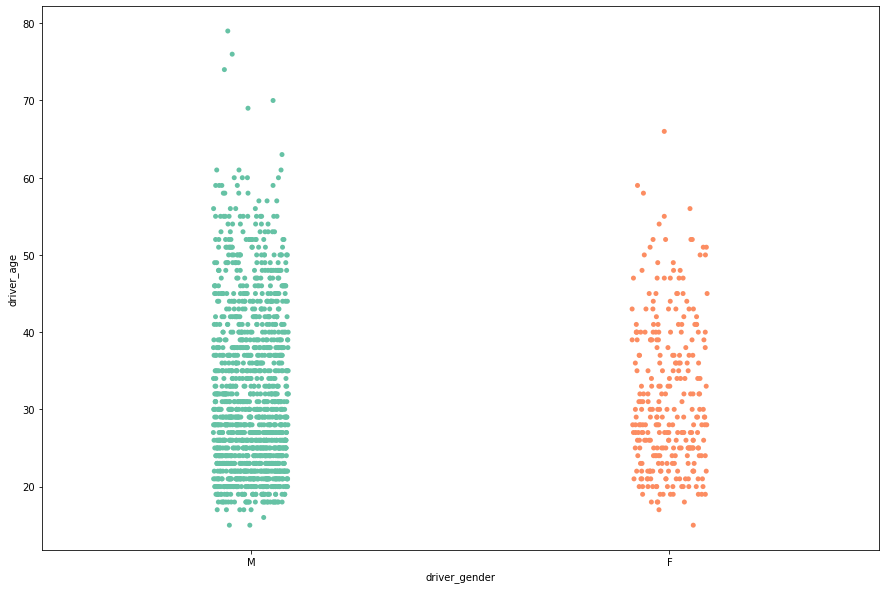

In [22]:
arrested_data=data.loc[data['stop_outcome'] == 'Arrest Driver']
plt.figure(figsize=(15,10))
sns.stripplot(x="driver_gender", y="driver_age", data=arrested_data, jitter=0.09,palette = 'Set2')
plt.show()

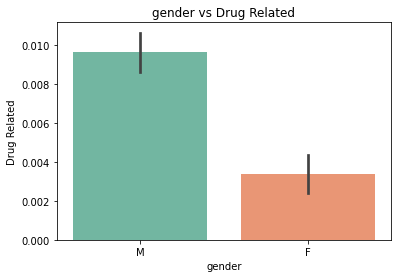

In [23]:
#plt.figure(figsize=(15,5))
sns.barplot(x='driver_gender',y='drugs_related_stop',data=data,palette = 'Set2')
plt.title('gender vs Drug Related')
plt.ylabel('Drug Related')
plt.xlabel('gender')
plt.show()

## The result of our poll : 

![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/our%20poll.jpeg)

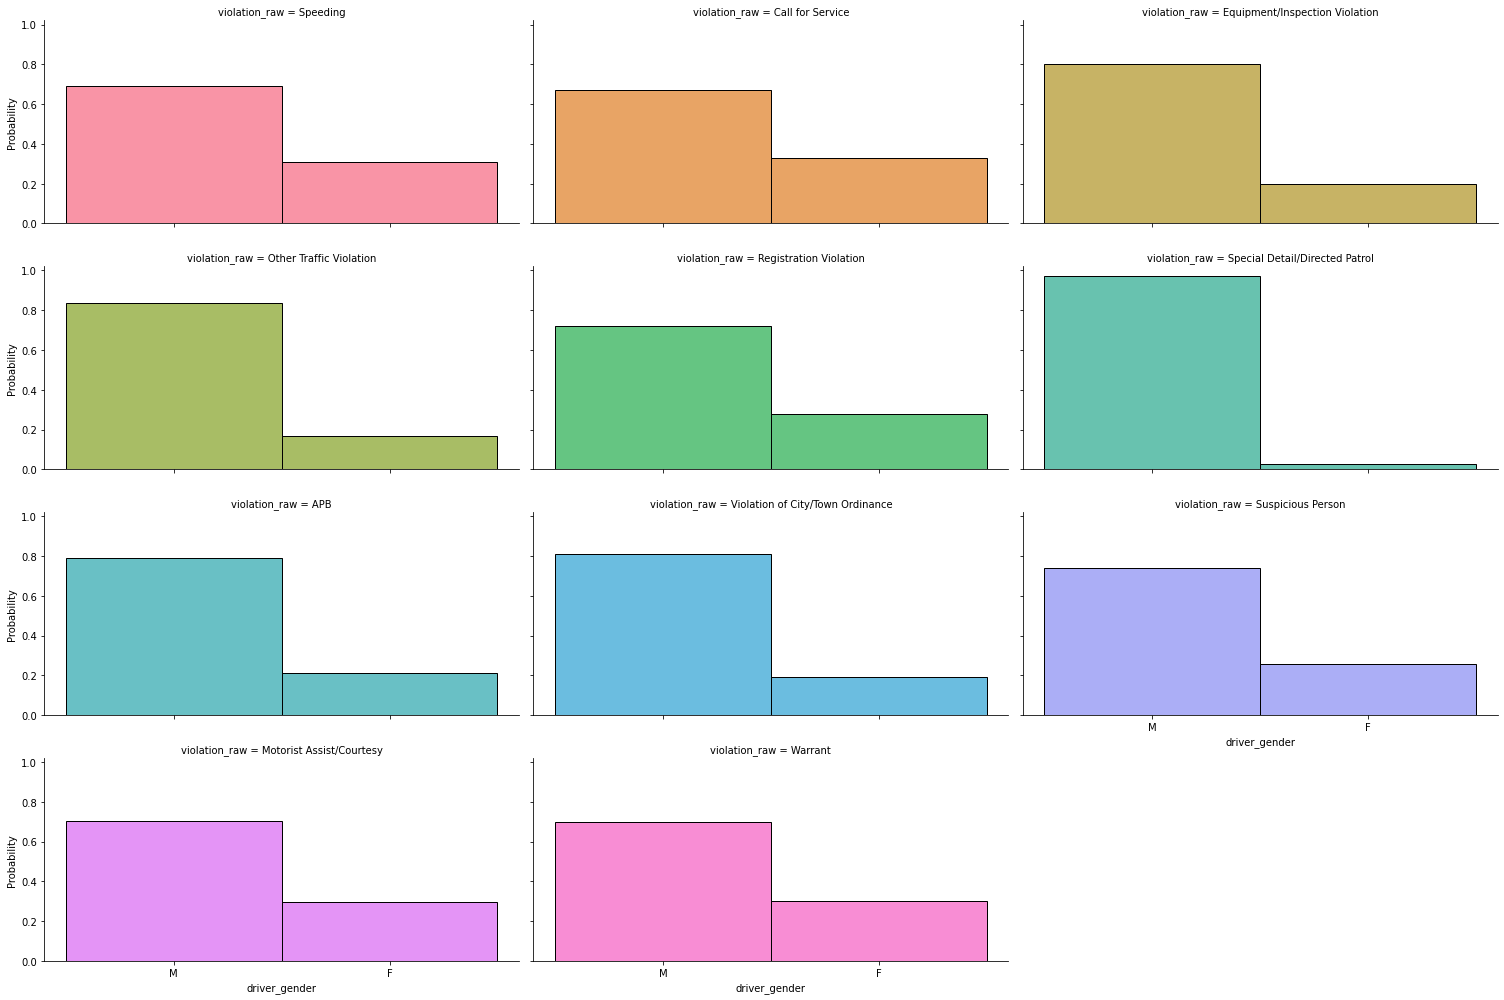

In [24]:
g = sns.FacetGrid(data = data, col="violation_raw", hue="violation_raw", col_wrap=3,height=3.5, aspect=2.0)
g.map_dataframe(sns.histplot, x = 'driver_gender', stat='probability')
plt.show()

---
## our last conclusion is that men behave less cautiously.
## Men have the highest chance of being caught for traffic offenses, drugs and even being taken into custody.
## more over,although most people think that womans drive worst than men ,they are actually do most of the traffic violations.  

![Image of Yaktocat](https://raw.githubusercontent.com/muter9/win_project/main/women.webp)

## Thank you for listening. 